<a href="https://colab.research.google.com/github/TrabalhosPUCPR/Ensembles/blob/main/Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# GRUPO: 
# Gabrielle Louise, Leonardo Knight

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#Download
!wget https://datahub.io/machine-learning/autos/r/1.csv -O autos.csv

--2023-05-28 20:12:55--  https://datahub.io/machine-learning/autos/r/1.csv
Resolving datahub.io (datahub.io)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3120::, ...
Connecting to datahub.io (datahub.io)|188.114.97.0|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pkgstore.datahub.io/machine-learning/autos/autos_csv/data/ac57bdf06d1a1f187db720ba88c6afeb/autos_csv.csv [following]
--2023-05-28 20:12:56--  https://pkgstore.datahub.io/machine-learning/autos/autos_csv/data/ac57bdf06d1a1f187db720ba88c6afeb/autos_csv.csv
Resolving pkgstore.datahub.io (pkgstore.datahub.io)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3120::, ...
Connecting to pkgstore.datahub.io (pkgstore.datahub.io)|188.114.96.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25011 (24K) [text/csv]
Saving to: ‘autos.csv’

autos.csv           100%[===================>]  24.42K  --.-KB/s    in 0s      

2023-05-28 20:12:56 (129 MB/s) - ‘autos.csv’ saved [25011/25011]



# Preparação dos dados para treinar e testar

In [ ]:
#Inserindo no pandas para facilitar a manipulação
initial_data = pd.read_csv('autos.csv')
initial_data = pd.get_dummies(initial_data)
labels = initial_data['symboling']
# data e declarado dentro da analise de dados

# Analise dos dados

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

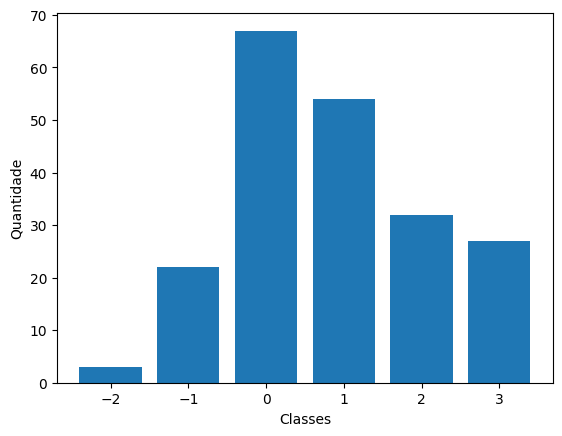

In [ ]:
plt.bar(np.unique(labels, return_counts=True)[0], np.unique(labels, return_counts=True)[1])
plt.xlabel("Classes")
plt.ylabel("Quantidade")
plt.plot

Os dados atuais estao muito desbalanceados, um veículo com classificação -2 por exemplo, existem pouquissimos exemplos

Existe tambem linhas com valores faltantes (Nan), que devem ser retirados da base

In [ ]:
initial_data.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,1,0,0
3,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,1,0,0
4,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
initial_data = initial_data.dropna(axis=0).reset_index(drop=True)
labels = initial_data['symboling']
data = initial_data.drop('symboling', axis=1)
data.head(5) # data agora esta sem as linhas com valores Nan

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,...,0,0,0,0,0,0,0,1,0,0
1,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,...,0,0,0,0,0,0,0,1,0,0
2,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,...,0,0,0,0,0,0,0,1,0,0
3,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,...,0,0,0,0,0,0,0,1,0,0
4,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,...,0,0,0,0,0,0,0,1,0,0


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

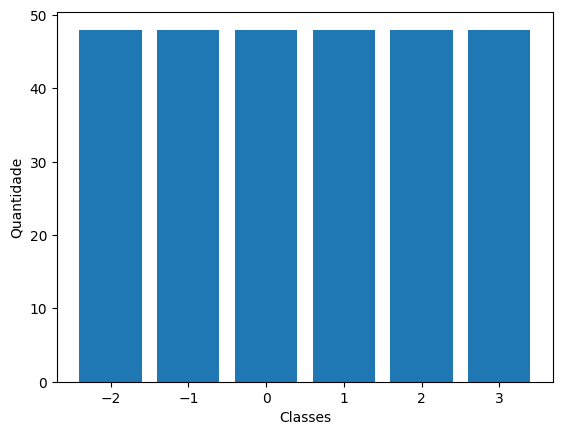

In [ ]:
over_sampler = RandomOverSampler(random_state=9999)
data, labels = over_sampler.fit_resample(data, labels)

plt.bar(np.unique(labels, return_counts=True)[0], np.unique(labels, return_counts=True)[1])
plt.xlabel("Classes")
plt.ylabel("Quantidade")
plt.plot

Agora as classes estao balanceadas

# Separando base para treinamento e teste

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.3, random_state=9999)

# Criando e Treinando os modelos

In [ ]:
rodadas = 5

times = []
tree = None
for _ in range(rodadas):
    tree = DecisionTreeClassifier()
    s_time = time.time()
    tree.fit(data_train, labels_train)
    times.append(time.time()-s_time)
print(f"Tempo médio de treinamento para a arvore: {np.mean(times)}")

times = []
mlp = None
for _ in range(rodadas):
    mlp = MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate_init=0.001, max_iter=2000, random_state=70)
    s_time = time.time()
    mlp.fit(data_train, labels_train)
    times.append(time.time()-s_time)
print(f"Tempo médio de treinamento para o MLP: {np.mean(times)}")

times = []
bagging_tree = None
for _ in range(rodadas):
    bagging_tree = BaggingClassifier(estimator=tree, n_estimators=10, random_state=0, max_features=0.7, bootstrap_features=True, max_samples=1.0,bootstrap=True)
    s_time = time.time()
    bagging_tree.fit(data_train, labels_train)
    times.append(time.time()-s_time)
print(f"Tempo médio de treinamento para o bagging da arvore: {np.mean(times)}")

times = []
bagging_mlp = None
for _ in range(rodadas):
    bagging_mlp = BaggingClassifier(estimator=mlp, n_estimators=10, random_state=0, max_features=0.7, bootstrap_features=True, max_samples=1.0,bootstrap=True)
    s_time = time.time()
    bagging_mlp.fit(data_train, labels_train)
    times.append(time.time()-s_time)
print(f"Tempo médio de treinamento para o bagging do MLP: {np.mean(times)}")

times = []
tree_boosting = None
for _ in range(rodadas):
    tree_boosting = AdaBoostClassifier(estimator=tree, n_estimators=50)
    s_time = time.time()
    tree_boosting.fit(data_train, labels_train)
    times.append(time.time()-s_time)
print(f"Tempo médio de treinamento para o boosting da arvore: {np.mean(times)}")

Tempo médio de treinamento para a arvore: 0.00349574089050293
Tempo médio de treinamento para o MLP: 0.1310323715209961
Tempo médio de treinamento para o bagging da arvore: 0.03402490615844726
Tempo médio de treinamento para o bagging do MLP: 1.570600414276123
Tempo médio de treinamento para o boosting da arvore: 0.0069637298583984375


Para a árvore, o tempo de treinamento foi veloz para todos os casos, mas para o mlp, foi devagar, principalmente com o bagging, com uma média (normalmente) maior que 1.5 segundos

# Testando os modelos

In [ ]:
times = []
tree_predict = None
for _ in range(rodadas):
    s_time = time.time()
    tree_predict = tree.predict(data_test)
    times.append(time.time()-s_time)
print(f"Tempo médio de teste para a arvore: {np.mean(times)}")

times = []
mlp_predict = None
for _ in range(rodadas):
    s_time = time.time()
    mlp_predict = mlp.predict(data_test)
    times.append(time.time()-s_time)
print(f"Tempo médio de teste para o MLP: {np.mean(times)}")

times = []
tree_bagging_predict = None
for _ in range(rodadas):
    s_time = time.time()
    tree_bagging_predict = bagging_tree.predict(data_test)
    times.append(time.time()-s_time)
print(f"Tempo médio de teste para o bagging da arvore: {np.mean(times)}")

times = []
mlp_bagging_predict = None
for _ in range(rodadas):
    s_time = time.time()
    mlp_bagging_predict = bagging_mlp.predict(data_test)
    times.append(time.time()-s_time)
print(f"Tempo médio de teste para o bagging do MLP: {np.mean(times)}")

times = []
tree_boosting_predict = None
for _ in range(rodadas):
    s_time = time.time()
    tree_boosting_predict = tree_boosting.predict(data_test)
    times.append(time.time()-s_time)
print(f"Tempo médio de teste para o boosting da arvore: {np.mean(times)}")

Tempo médio de teste para a arvore: 0.0029191493988037108
Tempo médio de teste para o MLP: 0.003536415100097656
Tempo médio de teste para o bagging da arvore: 0.004860401153564453
Tempo médio de teste para o bagging do MLP: 0.010748815536499024
Tempo médio de teste para o boosting da arvore: 0.00286250114440918


Os modelos com os parametros usados, possuem um tempo de teste extremamente veloz, mas o mlp ainda tem uma velocidade um pouco menor comparado com a árvore

# Analise da acurácia no teste dos modelos

### Arvore

              precision    recall  f1-score   support

          -2       1.00      1.00      1.00        16
          -1       0.93      1.00      0.97        14
           0       0.91      0.83      0.87        12
           1       0.89      0.80      0.84        20
           2       0.92      0.92      0.92        13
           3       0.86      1.00      0.92        12

    accuracy                           0.92        87
   macro avg       0.92      0.93      0.92        87
weighted avg       0.92      0.92      0.92        87



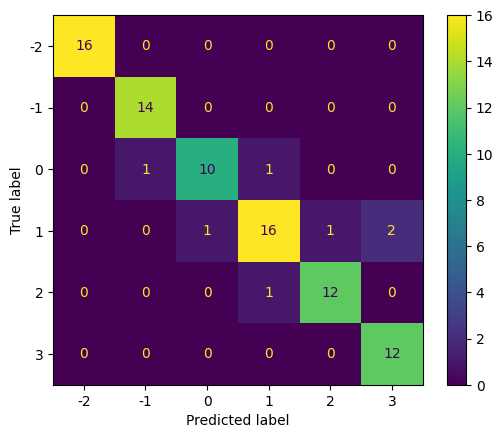

In [ ]:
# ARVORE
print(f"{classification_report(labels_test, tree_predict)}")
disp = ConfusionMatrixDisplay(confusion_matrix(labels_test, tree_predict), display_labels=[-2,-1,0,1,2,3])
disp.plot()
plt.show()

              precision    recall  f1-score   support

          -2       1.00      1.00      1.00        16
          -1       0.93      0.93      0.93        14
           0       0.91      0.83      0.87        12
           1       0.89      0.85      0.87        20
           2       1.00      1.00      1.00        13
           3       0.86      1.00      0.92        12

    accuracy                           0.93        87
   macro avg       0.93      0.94      0.93        87
weighted avg       0.93      0.93      0.93        87



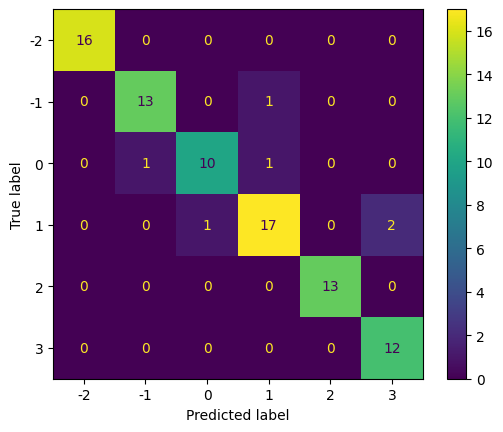

In [ ]:
# ARVORE BAGGING
print(f"{classification_report(labels_test, tree_bagging_predict)}")
disp = ConfusionMatrixDisplay(confusion_matrix(labels_test, tree_bagging_predict), display_labels=[-2,-1,0,1,2,3])
disp.plot()
plt.show()

              precision    recall  f1-score   support

          -2       1.00      1.00      1.00        16
          -1       0.93      1.00      0.97        14
           0       0.91      0.83      0.87        12
           1       0.88      0.75      0.81        20
           2       0.86      0.92      0.89        13
           3       0.86      1.00      0.92        12

    accuracy                           0.91        87
   macro avg       0.91      0.92      0.91        87
weighted avg       0.91      0.91      0.91        87



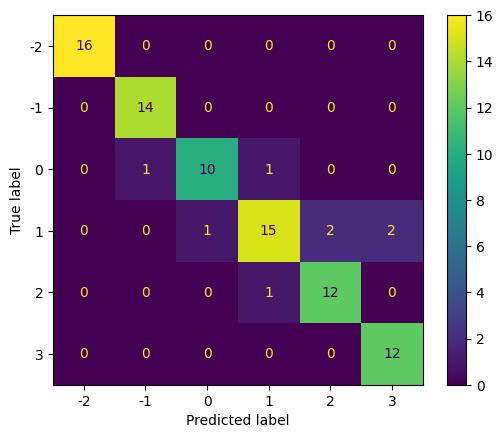

In [ ]:
# ARVORE BOOSTING
print(f"{classification_report(labels_test, tree_boosting_predict)}")
disp = ConfusionMatrixDisplay(confusion_matrix(labels_test, tree_boosting_predict), display_labels=[-2,-1,0,1,2,3])
disp.plot()
plt.show()

A acurácia da árvore foi de 91%, enquanto o com bagging foi de 93% e boosting 92%, então a diferença da acurácia destes a diferença é mínima

### MLP

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        16
          -1       0.25      0.07      0.11        14
           0       0.00      0.00      0.00        12
           1       0.70      0.80      0.74        20
           2       0.00      0.00      0.00        13
           3       0.15      0.75      0.25        12

    accuracy                           0.30        87
   macro avg       0.18      0.27      0.18        87
weighted avg       0.22      0.30      0.22        87



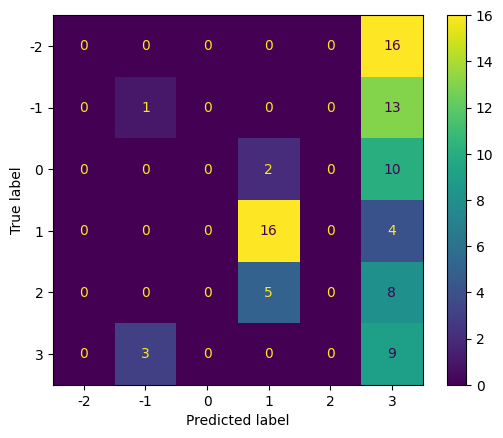

In [ ]:
# MLP
print(f"{classification_report(labels_test, mlp_predict)}")
disp = ConfusionMatrixDisplay(confusion_matrix(labels_test, mlp_predict), display_labels=[-2,-1,0,1,2,3])
disp.plot()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        16
          -1       0.43      0.93      0.59        14
           0       0.00      0.00      0.00        12
           1       0.49      0.90      0.63        20
           2       0.00      0.00      0.00        13
           3       0.55      0.92      0.69        12

    accuracy                           0.48        87
   macro avg       0.24      0.46      0.32        87
weighted avg       0.26      0.48      0.34        87



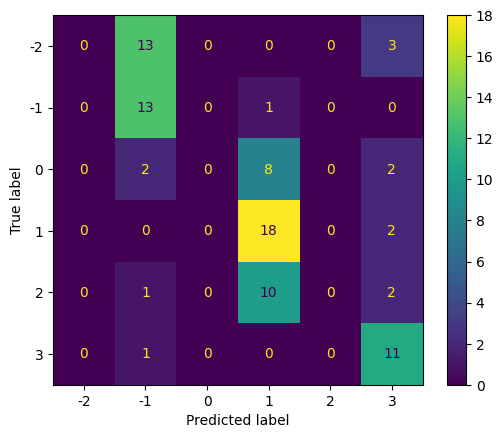

In [ ]:
# MLP BAGGING
print(f"{classification_report(labels_test, mlp_bagging_predict)}")
disp = ConfusionMatrixDisplay(confusion_matrix(labels_test, mlp_bagging_predict), display_labels=[-2,-1,0,1,2,3])
disp.plot()
plt.show()

No geral, a acurácia do mlp tanto sem e com bagging foi mais baixa que a da árvore de decisão, mas entre os dois testes com mlp, mlp com bagging teve um aumento de 18% na acurácia total de 48%, muito maior que a diferença do bagging em uma árvore de decisão